In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [12]:
wine_data = pd.read_csv('winequality-red.csv', sep=';')
features = wine_data.drop('quality', axis=1)
target = wine_data['quality']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

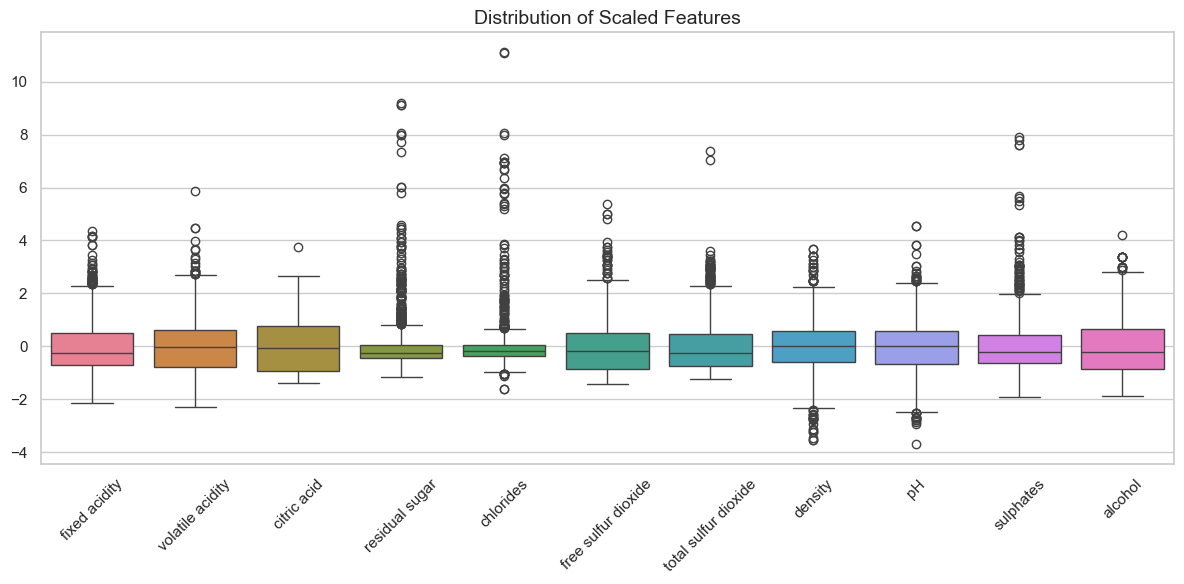

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=features_scaled_df)
plt.title('Distribution of Scaled Features', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplot_scaled_features.png')
plt.show()

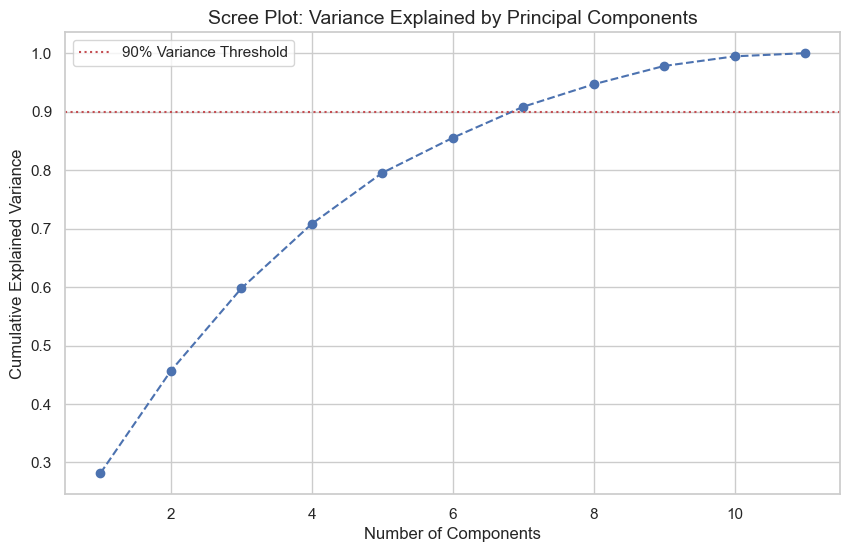

In [14]:
pca_full = PCA()
pca_full.fit(features_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: Variance Explained by Principal Components', fontsize=14)
plt.axhline(y=0.90, color='r', linestyle=':', label='90% Variance Threshold')
plt.legend()
plt.grid(True)
plt.savefig('scree_plot_variance.png')
plt.show()

In [15]:
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Quality'] = target

var_ratio = pca_2d.explained_variance_ratio_
print(f"Variance explained PC1 = {var_ratio[0]:.2%}, PC2 = {var_ratio[1]:.2%}")
print(f"Total variance preserved {sum(var_ratio):.2%}")

Variance explained PC1 = 28.17%, PC2 = 17.51%
Total variance preserved 45.68%


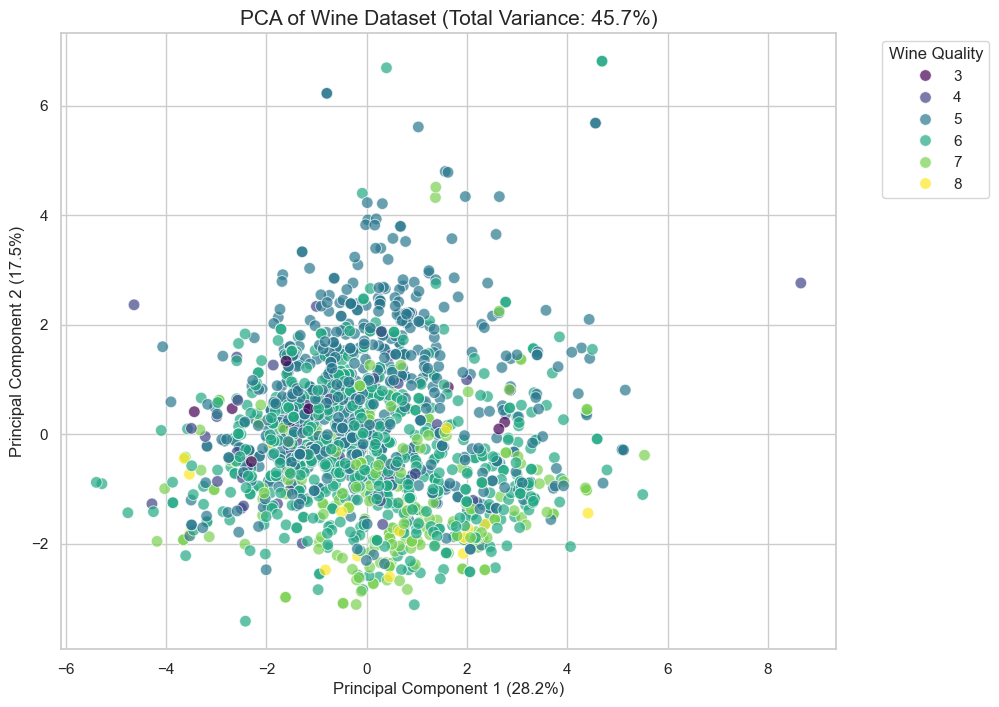

In [16]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Quality', 
    data=pca_df, 
    palette='viridis', 
    s=70, 
    alpha=0.7,
    edgecolor='w'
)
plt.title(f'PCA of Wine Dataset (Total Variance: {sum(var_ratio):.1%})', fontsize=15)
plt.xlabel(f'Principal Component 1 ({var_ratio[0]:.1%})')
plt.ylabel(f'Principal Component 2 ({var_ratio[1]:.1%})')
plt.legend(title='Wine Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('pca_wine_quality.png')
plt.show()

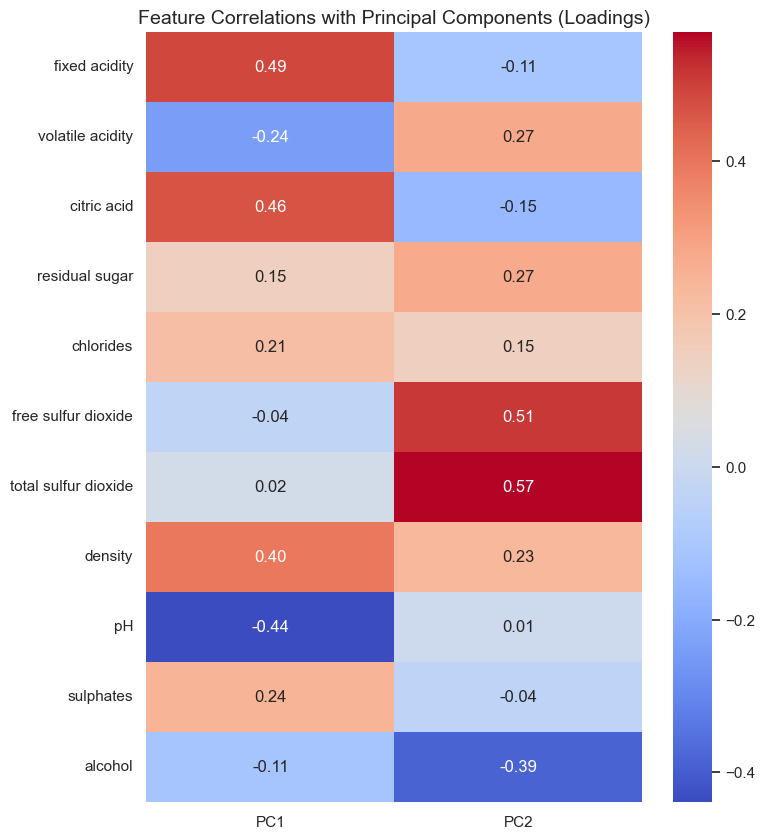

In [ ]:
loadings = pd.DataFrame(pca_2d.components_.T, columns=['PC1', 'PC2'], index=features.columns)

plt.figure(figsize=(8, 10))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations with Principal Components (Loadings)', fontsize=14)
plt.savefig('heatmap_pca_loadings.png')
plt.show()